<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/anomaly_detection_pyOD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loding data

In [1]:
import pandas as pd

# Load the dataset
df_billionaires = pd.read_csv('/content/drive/MyDrive/DM_Assignment_06/billionaire_forbes_list.csv')

# Display the first few rows for initial understanding
print(df_billionaires.head())


   Rank                  Name_Org        Forbes_ID  Net_Worth_($B)  age  \
0     1  Bernard Arnault & family  bernard-arnault             211   74   
1     2                 Elon Musk        elon-musk             180   51   
2     3                Jeff Bezos       jeff-bezos             114   59   
3     4             Larry Ellison    larry-ellison             107   78   
4     5            Warren Buffett   warren-buffett             106   92   

   Age_Range_How_Old Country_Working_In Source_Of_WealthCompany  \
0                  8             France                    LVMH   
1                  6      United States           Tesla, SpaceX   
2                  6      United States                  Amazon   
3                  8      United States                  Oracle   
4                 10      United States      Berkshire Hathaway   

                Industry  Age  ...           Residence    Citizenship  \
0       Fashion & Retail   74  ...       Paris, France         France   


Data Cleaning

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values in the entire dataset
print("Missing values in each column:\n", df_billionaires.isnull().sum())

# Dropping irrelevant columns
df_billionaires.drop(['Name_Org', 'Forbes_ID', 'Residence'], axis=1, inplace=True)

# Encoding categorical columns (example)
encoder = LabelEncoder()
categorical_columns = ['Country_Working_In', 'Industry', 'Marital Status']  # Add other categorical columns as needed
df_billionaires[categorical_columns] = df_billionaires[categorical_columns].apply(encoder.fit_transform)

# Standardizing the numerical columns
scaler = StandardScaler()
numerical_columns = ['Net_Worth_($B)', 'age']  # Add other numerical columns as needed
df_billionaires[numerical_columns] = scaler.fit_transform(df_billionaires[numerical_columns])

# Display the preprocessed data
print(df_billionaires.head())


Missing values in each column:
 Rank                       0
Name_Org                   0
Forbes_ID                  0
Net_Worth_($B)             0
age                        0
Age_Range_How_Old          0
Country_Working_In         0
Source_Of_WealthCompany    0
Industry                   0
Age                        0
Source of Wealth           0
Self-Made Score            0
Philanthropy Score         0
Residence                  0
Citizenship                0
Marital Status             0
Children                   0
Education                  0
Bachelor                   0
Master                     0
Doctorate                  0
Drop Out                   0
Self Made                  0
dtype: int64
   Rank  Net_Worth_($B)       age  Age_Range_How_Old  Country_Working_In  \
0     1        7.133963  0.444526                  8                   8   
1     2        5.949837 -1.249272                  6                  29   
2     3        3.428796 -0.660125                  6        

Setting Up PyOD for Anomaly Detection

In [3]:
!pip install pyod  # Run this in your Colab environment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=6bbad0f7ad82c2efc700ba340b8bf87cd72c0f0aa2ef48cb6ab3fed7a24bd98e
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [7]:
from sklearn.preprocessing import LabelEncoder

# Identifying categorical columns (excluding already encoded ones)
categorical_columns = df_billionaires.select_dtypes(include=['object']).columns.tolist()
# Add more removals as necessary based on previous encoding

# Encoding categorical columns
encoder = LabelEncoder()
for column in categorical_columns:
    df_billionaires[column] = encoder.fit_transform(df_billionaires[column])

# Verify the DataFrame
print(df_billionaires.head())


   Rank  Net_Worth_($B)       age  Age_Range_How_Old  Country_Working_In  \
0     1        7.133963  0.444526                  8                   8   
1     2        5.949837 -1.249272                  6                  29   
2     3        3.428796 -0.660125                  6                  29   
3     4        3.161413  0.739100                  8                  29   
4     5        3.123215  1.770108                 10                  29   

   Source_Of_WealthCompany  Industry  Age  Source of Wealth  Self-Made Score  \
0                       72         4   74                75                6   
1                      124         0   52               134                8   
2                        5        16   59                 6                8   
3                       94        16   79               100                9   
4                       19         5   92                22                8   

   Philanthropy Score  Citizenship  Marital Status  Children  

In [8]:
from pyod.models.knn import KNN

# Initialize the model
knn = KNN()

# Fit the model
knn.fit(df_billionaires)

# Get the prediction labels and outlier scores of the training data
labels = knn.labels_  # binary labels (0: inliers, 1: outliers)
scores = knn.decision_scores_  # raw outlier scores


In [9]:
# Adding the labels and scores to the DataFrame
df_billionaires['Anomaly_Label'] = labels
df_billionaires['Anomaly_Score'] = scores

# Display some of the identified anomalies
print(df_billionaires[df_billionaires['Anomaly_Label'] == 1].head())


    Rank  Net_Worth_($B)       age  Age_Range_How_Old  Country_Working_In  \
2      3        3.428796 -0.660125                  6                  29   
3      4        3.161413  0.739100                  8                  29   
4      5        3.123215  1.770108                 10                  29   
12    13        2.015485  1.401891                  9                  23   
52    53        0.067408 -1.249272                  6                   5   

    Source_Of_WealthCompany  Industry  Age  Source of Wealth  Self-Made Score  \
2                         5        16   59                 6                8   
3                        94        16   79               100                9   
4                        19         5   92                22                8   
12                      134         4   87               145                6   
52                       92        16   51                98                6   

    ...  Marital Status  Children  Education  Bach

Anomalies - Descriptive Statistics:
              Rank  Net_Worth_($B)        age  Age_Range_How_Old  \
count   22.000000       22.000000  22.000000          22.000000   
mean   109.136364        0.249714  -0.388983           6.727273   
std     73.060507        1.333452   1.189504           1.579084   
min      3.000000       -0.581952  -2.353923           4.000000   
25%     59.250000       -0.534205  -1.101985           6.000000   
50%    110.500000       -0.352766  -0.696947           6.000000   
75%    166.000000       -0.008988   0.352472           8.000000   
max    215.000000        3.428796   1.770108          10.000000   

       Country_Working_In  Source_Of_WealthCompany   Industry        Age  \
count           22.000000                22.000000  22.000000  22.000000   
mean            16.363636                53.227273  10.454545  63.000000   
std             12.148076                48.443322   5.754727  16.189356   
min              0.000000                 0.000000   0.

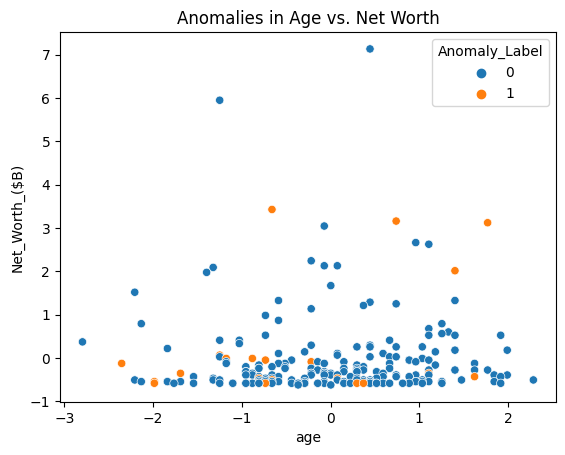

In [10]:
# Further analysis of anomalies
anomalies = df_billionaires[df_billionaires['Anomaly_Label'] == 1]
print("Anomalies - Descriptive Statistics:\n", anomalies.describe())

# Optional: Visualizations of anomalies vs. normal points
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_billionaires, x='age', y='Net_Worth_($B)', hue='Anomaly_Label')
plt.title('Anomalies in Age vs. Net Worth')
plt.show()


Interpretation of Anomalies

Understanding Anomalies: The identified anomalies have higher Anomaly_Score values, suggesting they are significantly different from the typical data points in the dataset. For instance, they might represent individuals with exceptionally high net worth, unique combinations of age and wealth, or other atypical characteristics.

Contextual Analysis: It's essential to interpret these anomalies in the context of the data. For example, are these anomalies representing the super-elite of the billionaires, or are there data entry errors

 Fine-Tuning the Anomaly Detection Model

Having identified anomalies and understood their characteristics, the next step is to fine-tune the anomaly detection model to optimize its performance. This involves adjusting parameters and potentially trying different algorithms.

Adjusting KNN Parameters

n_neighbors: The number of neighbors to consider. A larger number smooths the decision boundary and may lead to fewer anomalies.
method: The distance calculation method. You can experiment with different methods like 'largest', 'mean', or 'median'.

Trying Different Algorithms

PyOD offers a variety of algorithms. You might want to experiment with others, such as Isolation Forest or AutoEncoder, to see if they provide better or different insights.


In [12]:
# Adjusting KNN parameters
knn = KNN(n_neighbors=10, method='mean')
knn.fit(df_billionaires)
labels = knn.labels_

# Trying Isolation Forest
from pyod.models.iforest import IForest
iforest = IForest()
iforest.fit(df_billionaires)
if_labels = iforest.labels_

# Compare results
df_billionaires['KNN_Labels'] = labels
df_billionaires['IForest_Labels'] = if_labels

print("KNN Anomalies:\n", df_billionaires[df_billionaires['KNN_Labels'] == 1].head())
print("Isolation Forest Anomalies:\n", df_billionaires[df_billionaires['IForest_Labels'] == 1].head())


KNN Anomalies:
     Rank  Net_Worth_($B)       age  Age_Range_How_Old  Country_Working_In  \
0      1        7.133963  0.444526                  8                   8   
2      3        3.428796 -0.660125                  6                  29   
4      5        3.123215  1.770108                 10                  29   
12    13        2.015485  1.401891                  9                  23   
25    26        0.793162 -2.132993                  4                   5   

    Source_Of_WealthCompany  Industry  Age  Source of Wealth  Self-Made Score  \
0                        72         4   74                75                6   
2                         5        16   59                 6                8   
4                        19         5   92                22                8   
12                      134         4   87               145                6   
25                      125        16   39               135                6   

    ...  Education  Bachelor  Mast